# In this notebook I will show
# 1. Linear Regression from Scrach python
# 2. Linear Regression from SKLearn library
# 3. Save the model and Use the model

# **1. Linear Regression from scarch **

# Linear Regreesion:

Linear Regression is a supervised Machine Learning algorithm it is also considered to be the most simple type of predictive Machine Learning algorithm. There is some basic assumption that we make for linear regression to work, such as it is important that the relation between the independent and the target variable is linear in nature else our model will end up giving irrelevant results.

The word Linear in Linear Regression suggests that the function used for the prediction is a linear function. This function can be represented as shown below:
 # y=mx+b

# Calculating coefficient of the equation:
To calculate the coefficients we need the formula for Covariance and Variance, so the formula for these are:

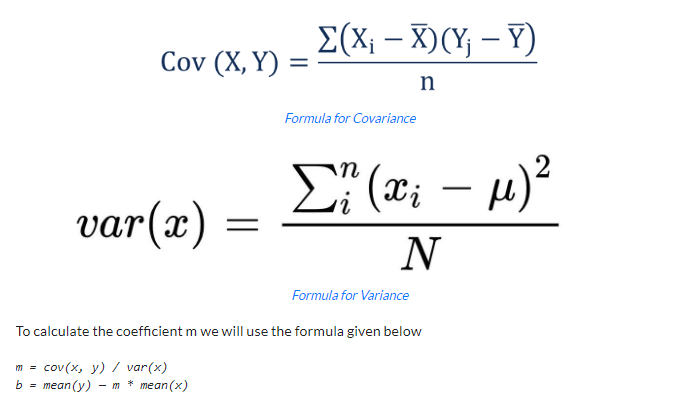](http://)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
class LinearRegressionFromScrach():  # Create Regression Class 
    def meanValue(self,values):
        return np.mean(values)
    
    def CoVariance(self,X_value,y_value):  #Define CoVariance
        n=len(X_value)
        X_mean=self.meanValue(X_value)
        y_mean=self.meanValue(y_value)
        conV=0
        for i in range(n):
            conV +=(X_value[i]-X_mean)*(y_value[i]-y_mean)
        return conV
   
    def VarX(self,X_value):  #Define Variance
        n=len(X_value)
        varX=0
        X_mean=self.meanValue(X_value)
        for i in range(n):
            varX +=((X_value[i]-X_mean)**2)
        return varX
       
    def fit(self,X,y):    # Model Fit
        covarianceXy=self.CoVariance(X,y)
        varX=self.VarX(X)
        self.min_m=covarianceXy/varX
        self.min_b=self.meanValue(y)-(self.min_m*self.meanValue(X))
        print('Regression Coefficient: {} Intercept: {}'.format(self.min_m,self.min_b))
        return self.min_m,self.min_b
   
    def predict(self,X):
        y_pred=X*self.min_m+self.min_b
        return y_pred
    
   # def Score(self,X,y):
        
    
    def Error_Calculation(self,X,y):
        MAE=0
        MSE=0
        n=len(y)
        r2_value_upper=0
        r2_value_lower=0
        y_mean=np.mean(y)
        y_pred=self.min_m*X+self.min_b
        for i in range(n):
            MAE +=np.abs((y[i]-y_pred[i]))
            MSE +=np.mean((y[i]-y_pred[i])**2)
        MAE=MAE/n
        MSE=MSE/n
        for i in range(n):
            r2_value_upper +=(y[i]-y_pred[i])**2
            r2_value_lower +=(y[i]-y_mean)**2
        r2_value=1-(r2_value_upper/r2_value_lower)
        
        print('Mean Absolute Error:{} Mean Square Error: {} R2_Score: {}'.format(MAE,MSE,r2_value))
   
    def plot_regression_Line(self,X,y): # Plot the Regression Line
        m,b=self.fit(X,y)
        predicted_value=[]
        for i in X:
            y_pred=i*m+b
            predicted_value.append(y_pred)
                  
        plt.figure(figsize=(4,4))
        sns.scatterplot(x=X,y=y,color='red',legend='auto')
        sns.lineplot(x=X,y=predicted_value,color='green')
        plt.xlabel('Height(Inches)')
        plt.ylabel('Weight(Pounds)')
        
        
        

In [3]:
def main():
    df=pd.read_csv('/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv')
    X = df.iloc[:,1].values
    y = df.iloc[:,-1].values
    #X=df['Height(Inches)']
    #y=df['Weight(Pounds)']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
    model=LinearRegressionFromScrach()
    model.fit(X_train,y_train)
    Y_pred=model.predict(X_test)
    print('Predictet value',Y_pred)
    model.Error_Calculation(X_test,y_test)
    model.plot_regression_Line(X_test,y_test)
    

Regression Coefficient: 3.062814052786032 Intercept: -81.11447643793609
Predictet value [123.33549794 134.00612771 124.67667359 ... 125.68063341 130.43237501
 123.04698086]
Mean Absolute Error:8.187041886060047 Mean Square Error: 105.05298919282576 R2_Score: 0.25883302999241686
Regression Coefficient: 3.1660679931452074 Intercept: -88.41888749402104


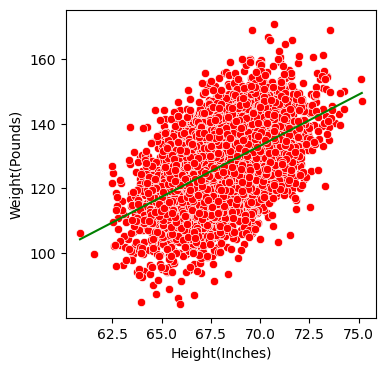

In [4]:
  if __name__ == "__main__" : 
        main() 

# metrics to use for model evaluation:
**For evaluation of a regression model we generally use the**

* r2_score
* mean_squared_error
* root_mean_squared_error
* mean_absolute_error

# R2 is a measure of the goodness of fit of a model. In regression, the R2 coefficient of determination is a statistical measure of how well the regression predictions approximate the real data points. An R2 of 1 indicates that the regression predictions perfectly fit the data.

![]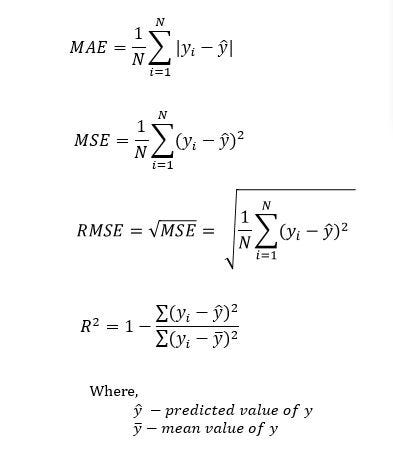(http://)

# 2. Linear Regression from Scrach with Gradient Descent

**Linear Regression Algorithm using Gradient Descent to minimise the cost**

In [5]:
class LinearRegressionFromScrachGD(): #Create Model Class
    def meanValue(self,values):
        return np.mean(values)
       
    def getUpdatedWeight(self,X,y,m,b):
        n=len(X)
        y_pred=m*X+b
        newmse=0
        learning_rate=0.00001
        iterations=1000
        for i in range(iterations):
            y_pred=m*X+b
            MSE=1/n*(np.sum(val**2 for val in (y-y_pred)))     # Calcultating Cost
            del_m=-(2/n)*(np.sum(X.dot(y-y_pred)))            # Derivative of Coefficient
            del_b=-(2/n)*(np.sum(y-y_pred))                  # Derivative of Intercept
            m=m-learning_rate*(del_m)
            b=b-learning_rate*(del_b)
            y_prednew=m*X+b
            newMSE=1/n*(np.sum(val2**2 for val2 in(y-y_prednew)))  # Calculation Cost after derivation of m and b
            if MSE-newMSE<0.0029:
                break
            #print('Iteration: {} MSE: {} New MSE: {} m:{} b: {}'.format(i,MSE,newMSE,m,b))
        return m,b
   
    def fit(self,X,y):             #Fit the Regression Model
        m=0
        b=0
        self.min_m,self.min_b=self.getUpdatedWeight(X,y,m,b)
        print('Coefficient of the Model is:{} and Intercept: {}'.format(self.min_m,self.min_b))
        return self.min_m,self.min_b
   
    def predict(self,X):
        y_pred=X*self.min_m+self.min_b
        return y_pred
    def plot_regression_line(self,X,y):
        m,b=self.fit(X,y)
        predicted=[]
        n=len(X)
        for i in X:
            y_predict=m*i+b
            predicted.append(y_predict)
        plt.figure(figsize=(4,4))
        sns.scatterplot(x=X,y=y,color='green')
        sns.lineplot(x=X,y=predicted,color='yellow')
        plt.xlabel('Height')
        plt.ylabel('Weight')
    
    def model_evaluation(self,X,y):
        MSE=0
        MAE=0
        r2_value=0
        n=len(X)
        m,b=self.fit(X,y)
        y_pred=X*m+b
        r2_value_upper=0
        r2_value_lower=0
        for i in range(n):
            MSE +=(y[i]-y_pred[i])**2
        MSE=MSE/n
        y_mean=np.mean(y)
        for i in range(n):
            r2_value_upper +=(y[i]-y_pred[i])**2
            r2_value_lower +=(y[i]-y_mean)**2
        r2_value=1-(r2_value_upper/r2_value_lower)
        print('MSE: {} and R2 Value: {}'.format(MSE,r2_value))

In [6]:
def main():
    df=pd.read_csv('/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv')
    X = df.iloc[:,1].values
    y = df.iloc[:,-1].values
    #X=df['Height(Inches)']
    #y=df['Weight(Pounds)']
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=0)
    model=LinearRegressionFromScrachGD()
    model.fit(X_train,y_train)
    Y_pred=model.predict(67.52918)
    print(Y_pred)
    model.plot_regression_line(X_train,y_train)
    model.model_evaluation(X_test,y_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Coefficient of the Model is:1.8687128748532333 and Intercept: 0.02737218692288868
126.22002028120436
Coefficient of the Model is:1.8687128748532333 and Intercept: 0.02737218692288868


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.


Coefficient of the Model is:1.8649553635828522 and Intercept: 0.02729793054445489
MSE: 111.15241320271052 and R2 Value: 0.2158005408939866


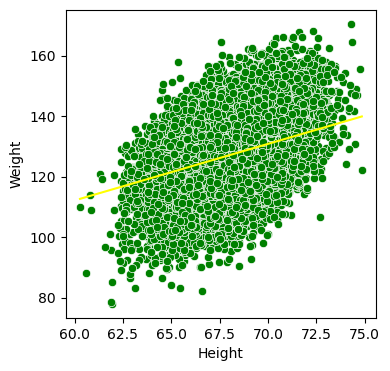

In [7]:
 if __name__ == "__main__" : 
        main() 

# 3. Using Scikit Learn 

In [8]:
dfx=pd.read_csv('/kaggle/input/heights-and-weights-dataset/SOCR-HeightWeight.csv')

In [9]:
dfx

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971
...,...,...,...
24995,24996,69.50215,118.0312
24996,24997,64.54826,120.1932
24997,24998,64.69855,118.2655
24998,24999,67.52918,132.2682


In [10]:
 XXXX = dfx.iloc[:,1].values
 yyyy = dfx.iloc[:,-1].values

In [11]:
XX=dfx[['Height(Inches)']]
yy=dfx[['Weight(Pounds)']]

In [12]:
XX

,Height(Inches)
0,65.78331
1,71.51521
2,69.39874
3,68.21660
4,67.78781
...,...
24995,69.50215
24996,64.54826
24997,64.69855
24998,67.52918


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [14]:
XX_train,XX_test,yy_train,yy_test=train_test_split(XX,yy,test_size=0.2,random_state=42)

In [15]:
lr=LinearRegression()
lr.fit(XX_train,yy_train)

LinearRegression()

In [16]:
yy_pred=lr.predict(XX_test)

In [17]:
lr.score(XX_train,yy_train)

0.2508830163228677

In [18]:
lr.score(XX_test,yy_test)

0.26059113512888576

In [19]:
m=lr.coef_
m

array([[3.07124501]])

In [20]:
b=lr.intercept_
b

array([-81.73686228])

In [21]:
up=(yy_test-yy_pred)**2
dn=(yy_test-np.mean(yy_test))**2

In [22]:
r2=1-(np.sum(up)/np.sum(dn))
r2

Weight(Pounds)    0.260591
dtype: float64